# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset

In [2]:
data=pd.read_table('C:\MY DRIVE\Personal\dataset\All_Data\All_Data\P339.txt')

In [3]:
data

,Y,X1,X2,X3
0,0,-62.8,-89.5,1.7
1,0,3.3,-3.5,1.1
2,0,-120.8,-103.2,2.5
3,0,-18.1,-28.8,1.1
4,0,-3.8,-50.6,0.9
...,...,...,...,...
61,1,53.1,7.1,1.9
62,1,39.8,13.8,1.2
63,1,59.5,7.0,2.0
64,1,16.3,20.4,1.0


# Seperate predictor and target variable

In [5]:
X=data.iloc[:,1:]
Y=data.iloc[:,0]

# Standarize the dataset

In [6]:
X_mean=X.mean()
X_std=X.std()
X_normal=(X-X_mean)/X_std

In [7]:
X_normal

,X1,X2,X3
0,-0.690959,-1.855309,-0.019874
1,0.237914,0.107878,-0.582014
2,-1.506005,-2.168049,0.729646
3,-0.062811,-0.469664,-0.582014
4,0.138141,-0.967309,-0.769394
...,...,...,...
61,0.937730,0.349853,0.167506
62,0.750831,0.502799,-0.488324
63,1.027666,0.347570,0.261196
64,0.420596,0.653462,-0.675704


# Calculate covariance matrix

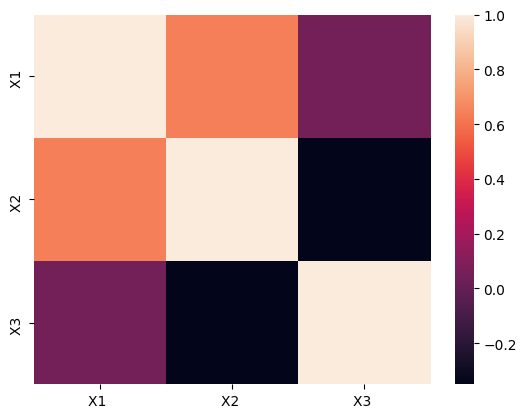

In [11]:
Z=X_normal.cov()
sns.heatmap(Z)
plt.show()

In [36]:
Z

,X1,X2,X3
X1,1.000000,0.640876,0.046741
X2,0.640876,1.000000,-0.350069
X3,0.046741,-0.350069,1.000000


# Calculate eigen values and eigen vectors of the covariance matrix

In [12]:
eigenvalues, eigenvectors = np.linalg.eig(Z)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)

Eigen values:
 [0.24940267 1.71131587 1.03928146]
Eigen values Shape: (3,)
Eigen Vector Shape: (3, 3)


In [13]:
eigenvectors

array([[ 0.61787894, -0.62471494,  0.47744828],
       [-0.6971437 , -0.71608783, -0.03476891],
       [-0.36361556,  0.31136708,  0.87797168]])

# Sort the eigenvalues in descending order

In [14]:
# Index the eigenvalues in descending order
idx = eigenvalues.argsort()[::-1]
idx

array([1, 2, 0], dtype=int64)

In [15]:
# Sort the eigenvalues in descending order
eigenvalues = eigenvalues[idx]
eigenvalues

array([1.71131587, 1.03928146, 0.24940267])

In [16]:
# sort the corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:,idx]

In [17]:
eigenvectors

array([[-0.62471494,  0.47744828,  0.61787894],
       [-0.71608783, -0.03476891, -0.6971437 ],
       [ 0.31136708,  0.87797168, -0.36361556]])

# Variation preserved by the principal components

In [18]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var

array([0.57043862, 0.91686578, 1.        ])

First two principal component preserve more than 90% variability of the dataset

# Principal Components of the feature set

In [20]:
pcs=eigenvectors[:,:2]
pca_component=pd.DataFrame(pcs,columns=['PC1','PC2'])


In [21]:
pca_component

,PC1,PC2
0,-0.624715,0.477448
1,-0.716088,-0.034769
2,0.311367,0.877972


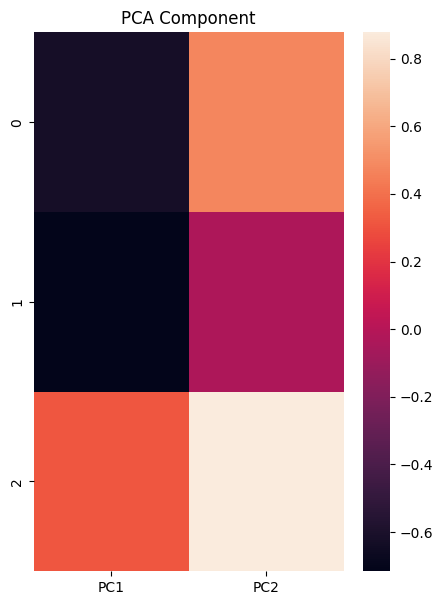

In [22]:
# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()

In [25]:
pca_component.shape

(3, 2)

In [26]:
X_normal.shape

(66, 3)

In [29]:
X_normal_pca=np.dot(X_normal,pca_component)

In [30]:
X_normal_pca

array([[ 1.75402842e+00, -2.82838415e-01],
       [-4.07098522e-01, -4.01150898e-01],
       [ 2.72052568e+00, -3.05005836e-03],
       [ 1.94339404e-01, -5.24650596e-01],
       [ 3.66815924e-01, -5.75918565e-01],
       [ 1.19563776e+00, -2.98533535e-01],
       [-1.87134732e-03, -6.30716488e-01],
       [ 1.51885217e+00, -2.20410509e+00],
       [-5.76822595e-01, -3.65359382e-01],
       [ 9.87118502e-01, -7.90728046e-01],
       [ 5.23292469e-01, -5.79826202e-01],
       [ 1.35294363e+00, -1.34851225e+00],
       [ 3.26453300e+00, -2.69313604e+00],
       [ 1.33433550e-01,  3.80489720e-01],
       [ 1.27893768e+00, -8.63613419e-01],
       [ 7.40734399e+00,  3.15529753e+00],
       [ 8.56486813e-01,  1.24909919e+00],
       [-2.35052709e-01, -4.53746687e-01],
       [ 2.25000458e-02, -3.43571951e-01],
       [ 4.43634734e-02, -1.40057580e+00],
       [ 2.45618955e-01, -7.72532196e-01],
       [-2.28535587e-01, -7.06864365e-01],
       [ 9.40025953e-01, -5.73534685e-01],
       [ 9.

# Create new dataframe

In [32]:
X_transformed= pd.DataFrame(X_normal_pca,
                     columns = ['PCA1','PCA2']
                            )

In [33]:
X_transformed.head()

,PCA1,PCA2
0,1.754028,-0.282838
1,-0.407099,-0.401151
2,2.720526,-0.003050
3,0.194339,-0.524651
4,0.366816,-0.575919


# Plot the points

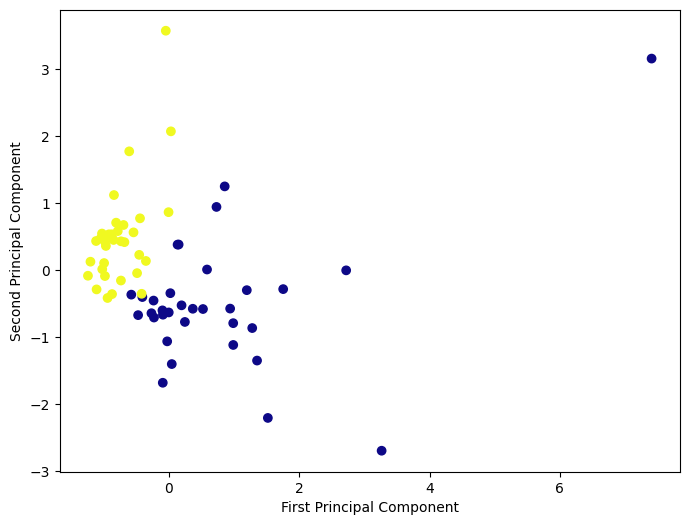

In [37]:
# giving a larger plot
plt.figure(figsize=(8, 6))
 
plt.scatter(X_transformed.iloc[:, 0], X_transformed.iloc[:, 1],
            c=Y,
            cmap='plasma')
 
# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.savefig('2D plot.jpeg')
plt.show()
